In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_style("darkgrid")

In [3]:
df = pd.read_csv("../output/all_losses_ssize800_220618-1153.csv", index_col="idx")

In [8]:
df_long = df.melt(["model", "dataset"], var_name="loss")

In [9]:
df_long

,model,dataset,loss,value
0,4,mocap,l1,0.117926
1,4,mocap,l1,0.208099
2,4,mocap,l1,0.211874
3,4,mocap,l1,0.132784
4,4,mocap,l1,0.196964
...,...,...,...,...
108535,99,train_mocap,l3,0.558938
108536,99,train_mocap,l3,0.207178
108537,99,train_mocap,l3,0.310831
108538,99,train_mocap,l3,0.304859


In [5]:
df_agg = df.melt(["model", "dataset"], var_name="loss").groupby(["model", "dataset", "loss"]).agg({"value": [np.mean, np.min, np.max]}).reset_index().droplevel(0, "columns")
df_agg.columns = ["train_iter", "dataset", "loss", "mean", "amin", "amax"]

In [6]:
df_agg

,train_iter,dataset,loss,mean,amin,amax
0,4,mocap,l1,0.169921,0.054206,0.742927
1,4,mocap,l2,0.282731,0.109643,1.038511
2,4,mocap,l3,0.394083,0.165680,1.493945
3,4,mupots,l1,0.105428,0.043434,0.216069
4,4,mupots,l2,0.193143,0.077659,0.336401
...,...,...,...,...,...,...
175,99,mupots,l2,0.194152,0.078636,0.524939
176,99,mupots,l3,0.307110,0.125277,0.671397
177,99,train_mocap,l1,0.090713,0.039476,0.218960
178,99,train_mocap,l2,0.147107,0.058076,0.356842


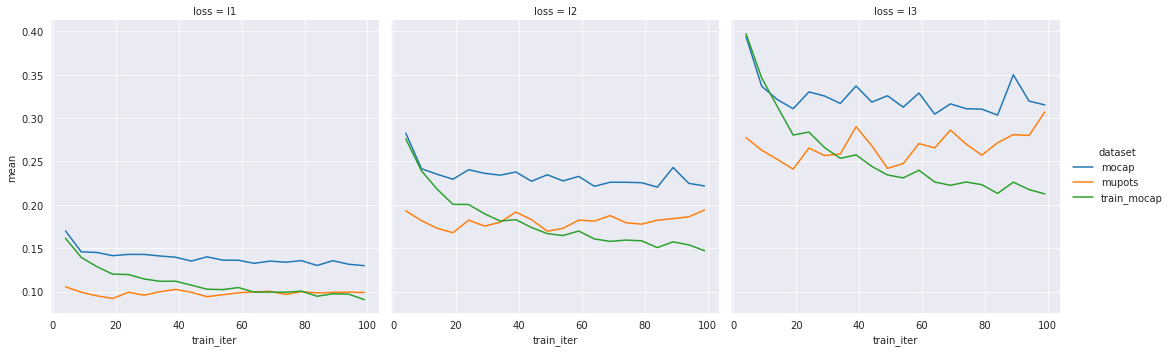

In [7]:
g = sns.FacetGrid(df_agg, col="loss", hue="dataset", height=5)
g.map(sns.lineplot, "train_iter", "mean")
g.add_legend()

<AxesSubplot:xlabel='model', ylabel='value'>

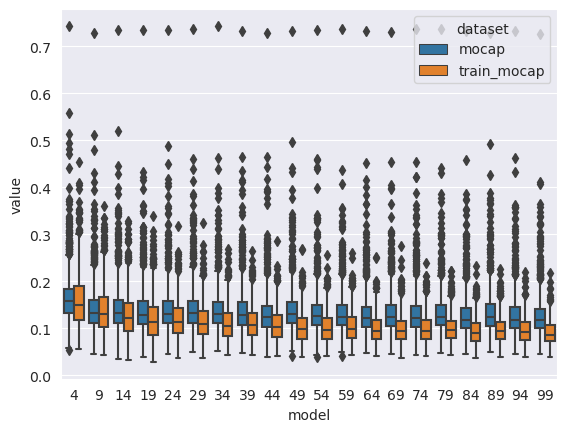

In [15]:
sns.boxplot(data=df_long[(df_long.loss=="l1") & (df_long.dataset != "mupots")], x="model", y="value", hue="dataset")